<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6823/NGC_6823_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 4.9MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 2.6MB 68.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=dc9429bca125d5f9edb5f668dbffab1b0bd496277b1e99e91599f6b0330b1408
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC6823 center

coordinate = coord.SkyCoord.from_name('NGC6823')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (295.7875, 23.3)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 2020089356027897984,2020089356027897984,460323388,2015.5,295.788262,0.348557,23.300483,0.300012,-0.481929,0.442188,-1.089874,-8.491635,0.821111,-8.999262,0.618153,0.046971,-0.359205,-0.072761,0.318171,0.179414,0.314828,-0.244340,0.136165,-0.361228,-0.070342,131,0,129,2,10.011535,356.572540,1.714725,10.394134,31,False,0.185658,1.433038,0.078069,0.041376,...,1711.930893,114.652780,14.931438,16.678204,3.449107,0,1.108465,-0.638451,1.746916,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.402627,-0.144372,303.600159,43.777841,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.000842
1,1635721458409799680,Gaia DR2 2020089356034969216,2020089356034969216,1536287709,2015.5,295.786467,0.293790,23.299823,0.265644,-0.392266,0.401268,-0.977567,1.953808,0.666258,-3.744219,0.552235,0.103655,-0.128643,0.313646,0.401738,0.423083,0.372998,0.168258,0.059869,0.118420,0.394597,165,0,161,4,16.851202,681.311401,1.802835,28.471491,31,False,0.220221,1.351326,0.068102,-0.071606,...,1928.413348,12.444485,154.961273,16.548920,1.915693,0,2.163383,0.759989,1.403395,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.401234,-0.143270,303.597723,43.777595,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.000972
2,1635721458409799680,Gaia DR2 2020089356027626496,2020089356027626496,1548515625,2015.5,295.786368,6.544765,23.299976,2.042477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,0,79,0,3.053328,116.801094,1.982713,2.455494,3,False,0.076799,NaN,NaN,0.254767,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.401321,-0.143115,303.597651,43.777765,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001046
3,1635721458409799680,Gaia DR2 2020089351728656384,2020089351728656384,1580774310,2015.5,295.788384,0.189041,23.301521,0.206388,-1.985408,0.256101,-7.752450,-1.505254,0.374015,-3.534351,0.358244,0.092227,0.072633,-0.463353,-0.004710,0.350887,-0.060783,-0.435308,-0.190400,-0.251565,0.011754,221,186,221,0,78.299789,9344.104492,1.144950,301.551276,31,False,0.745399,1.642257,0.064160,0.051443,...,104315.035754,157.473075,662.430908,12.216053,1.258858,0,0.968729,0.371762,0.596967,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.403582,-0.143953,303.600654,43.778821,110001,5237.946777,4950.00000,5365.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001715
4,1635721458409799680,Gaia DR2 2020089356028193024,2020089356028193024,1020837176,2015.5,295.788025,0.349028

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [8]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered['pmdec_over_error'] > 3) & (all_stars_filtered['pmra_over_error'] > 3)]

In [9]:
all_stars_filtered.shape

(33098, 99)

##### Visualizing GAIA data

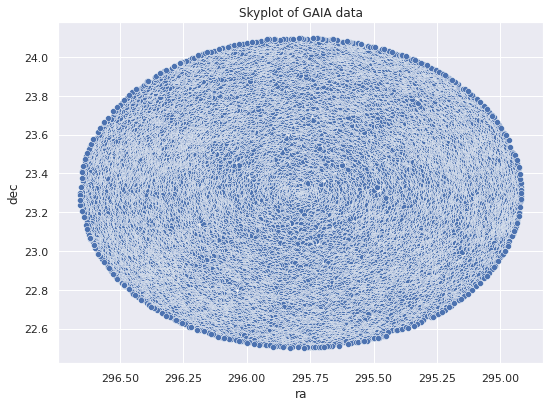

In [10]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [11]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [12]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [13]:
## saving only NGC 6823 data from Cantat GAIA DR2 paper

cantat_6823 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6823")
cantat_6823 = cantat_6823[0].to_pandas()
cantat_6823

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,295.920964,23.216926,2020038086994047744,0.5395,-1.690,-6.012,NaN,12.571400,6.8707,0.2,NGC_6823,295.920972,23.216952
1,295.969964,23.253341,2020039671850991360,0.4589,-1.843,-5.034,NaN,15.561300,1.2442,0.4,NGC_6823,295.969973,23.253363
2,295.932955,23.239756,2020039603131544704,0.4530,-1.355,-5.335,NaN,15.595200,1.7401,0.7,NGC_6823,295.932961,23.239779
3,295.939990,23.173428,2020037644626451200,0.5261,-1.915,-5.115,NaN,16.928801,2.6232,0.4,NGC_6823,295.939998,23.173450
4,295.861400,23.128553,2020031249406016896,0.4379,-1.512,-5.757,NaN,16.452200,1.5907,0.4,NGC_6823,295.861408,23.128578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,295.927210,23.411714,2020115125839583744,0.4833,-1.891,-5.302,NaN,14.713000,1.1106,0.9,NGC_6823,295.927219,23.411737
232,295.920987,23.412044,2020115125839588224,0.4233,-1.544,-5.404,NaN,13.826200,1.0384,1.0,NGC_6823,295.920994,23.412067
233,295.619401,23.405934,2020103439222069632,0.3885,-2.396,-5.511,NaN,17.872200,2.7512,0.3,NGC_6823,295.619412,23.405958
234,295.679190,23.468667,2020105505111917952,0.4928,-1.264,-5.499,NaN,15.276500,1.6758,0.6,NGC_6823,295.679196,23.468690


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_6823 = cantat_6823.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_6823 = cantat_6823.loc[:,['source_id', 'PMemb']]


In [16]:
# join the two table on source_id
cantat_6823 = all_stars_filtered.join(cantat_6823.set_index('source_id'), on='source_id')

In [17]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6823 = cantat_6823.dropna(subset=['PMemb'])
cantat_6823

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
6,1635721458409799680,Gaia DR2 2020089356034971904,2020089356034971904,1153737846,2015.5,295.786952,0.025917,23.302252,0.027535,0.441900,0.035747,12.361852,-1.506232,0.051723,-5.688355,0.051684,0.027910,0.048557,-0.495954,0.021640,0.230876,-0.013230,-0.392527,-0.138881,-0.257707,-0.039562,248,248,247,1,9.648332,521.259094,0.0,0.000000e+00,31,False,271.469269,1.637383,0.007620,0.016835,...,9.752472,1.207587,1,0.814715,0.329256,0.485459,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.403562,-0.142448,303.599128,43.779846,100002,5822.000000,5793.000000,5847.666504,1.4097,0.9840,1.9164,0.7605,0.4810,0.9820,200111,17.177341,17.026882,17.349752,305.418518,268.034546,342.802490,https://gea.esac.esa.int/data-server/datalink/...,,0.002303,29.120912,110.059266,0.4
8,1635721458409799680,Gaia DR2 2020089351727820544,2020089351727820544,1412174351,2015.5,295.789307,0.030123,23.298308,0.038913,0.333098,0.044622,7.464800,-1.683156,0.062548,-5.397950,0.064193,0.015664,0.193115,-0.392750,0.046887,0.236089,0.119670,-0.128139,-0.007626,-0.125009,0.056532,152,0,152,0,-0.253390,142.045334,0.0,0.000000e+00,31,False,17.985975,1.387486,0.009723,0.083188,...,14.220900,1.396874,1,1.868935,0.870916,0.998018,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.401218,-0.146287,303.600728,43.775499,100002,4157.799805,3862.000000,4581.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.555946,4.575490,6.439626,8.311226,5.820683,10.801768,https://gea.esac.esa.int/data-server/datalink/...,,0.002371,26.909671,84.090034,0.9
9,1635721458409799680,Gaia DR2 2020089356034966400,2020089356034966400,732768189,2015.5,295.787697,0.020321,23.296926,0.025250,0.397497,0.041905,9.485595,-1.934796,0.046384,-5.452119,0.068189,-0.174331,0.158247,-0.238091,-0.144755,-0.286592,-0.223280,0.260166,0.336729,-0.696058,-0.460995,201,0,201,0,-4.179054,123.864235,0.0,0.000000e+00,31,False,50.302013,1.494667,0.006569,-0.019303,...,13.418085,1.283113,1,1.366456,0.601500,0.764956,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.399283,-0.145692,303.598281,43.774512,100002,4904.692383,4603.906250,5402.129883,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.652692,3.835287,5.280499,11.286271,8.595644,13.976898,https://gea.esac.esa.int/data-server/datalink/...,,0.003085,41.712356,79.956101,0.9
12,1635721458409799680,Gaia DR2 2020089351728657664,2020089351728657664,1323681589,2015.5,295.789747,0.018816,23.302485,0.025323,0.453941,0.027600,16.447395,-1.637919,0.038019,-5.516195,0.054220,-0.004335,0.119424,-0.497176,0.115403,0.081672,0.086073,-0.553789,-0.079414,0.135656,-0.021080,198,0,196,2,-6.405073,90.765633,0.0,0.000000e+00,31,False,67.916969,1.553231,0.005521,0.121003,...,13.222191,1.262169,0,1.072590,0.431018,0.641572,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.405041,-0.144559,303.602657,43.779457,100001,505

In [18]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6823.to_csv('NGC_6823_cantat.csv')
# all_stars.to_csv('NGC_6823_Gaia_30m.csv')

In [19]:
cantat_6823.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,2.200000e+02,2.200000e+02,2.200000e+02,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,2.190000e+02,219.000000,219.000000,219.000000,219.000000,220.000000,219.000000,219.000000,219.000000,0.0,0.0,220.0,0.0,0.0,0.0,220.000000,220.000000,220.000000,220.000000,173.000000,173.000000,173.000000,173.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,220.000000,220.000000,220.000000,220.000000
mean,1.635721e+18,2.020091e+18,8.898165e+08,2015.5,295.792617,0.039140,23.329534,0.044425,0.460003,0.059886,10.441980,-1.724831,0.081037,-5.280752,0.088196,-0.036800,-0.049172,-0.293734,0.072898,0.191215,0.042054,-0.272684,-0.097298,-0.157476,-0.054611,245.350000,22.518182,243.609091,1.740909,0.613675,296.973175,0.073778,1.750059,31.0,50.028385,1.463395,0.011651,-0.005027,28.031818,13.622727,...,5.043360e+04,117.933456,502.070312,14.524571,1.344774,0.172727,1.616946,0.756760,0.860186,NaN,NaN,0.0,NaN,NaN,NaN,59.429835,-0.133372,303.615194,43.805056,100059.121387,4615.183594,4430.080566,4918.141113,2.032288,1.728835,2.419694,1.015488,0.855196,1.217604,200111.0,4.828623,4.317302,5.223732,20.218653,17.528107,22.909193,0.095527,29.318221,83.498502,0.705000
std,0.000000e+00,1.275173e+13,4.725485e+08,0.0,0.085578,0.023554,0.074354,0.026102,0.065768,0.035877,5.336896,0.281343,0.049533,0.265237,0.053779,0.082060,0.091110,0.157904,0.071595,0.099685,0.083795,0.122944,0.129104,0.111266,0.102184,26.872611,69.877418,26.611391,2.920743,6.716753,616.873413,0.126891,12.789674,0.0,94.827057,0.093706,0.007173,0.047051,2.981509,0.954887,...,1.342803e+05,499.488118,396.440247,1.652384,0.112265,0.390740,0.621411,0.421719,0.221961,NaN,NaN,0.0,NaN,NaN,NaN,0.077314,0.075667,0.109936,0.073547,336.016892,630.935120,623.622620,619.761658,0.567328,0.565510,0.460402,0.288556,0.287885,0.235884,0.0,3.260908,2.935808,3.476829,43.775967,38.749149,48.813389,0.058610,15.612852,44.083880,0.279142
min,1.635721e+18,2.020031e+18,1.017820e+07,2015.5,295.589029,0.011649,23.128553,0.014271,0.289477,0.018766,3.054510,-2.541669,0.023894,-6.179777,0.026963,-0.371867,-0.356643,-0.713473,-0.144755,-0.286592,-0.223280,-0.711844,-0.357489,-0.696058,-0.460995,140.000000,0.000000,140.000000,0.000000,-8.513625,84.422424,0.000000,0.000000,31.0,0.803691,1.023783,0.003340,-0.116399,

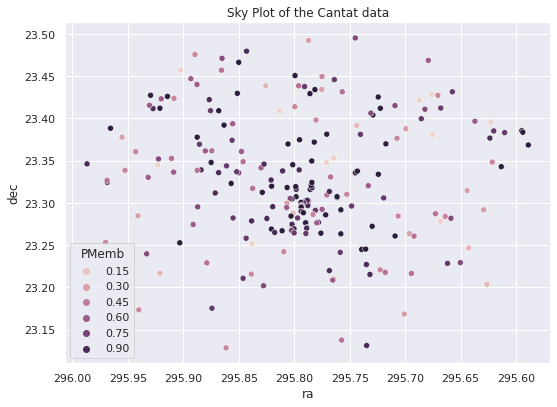

In [20]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_6823['ra'], y = cantat_6823['dec'], 
                          hue = cantat_6823['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [21]:
# import member dataset
member = cantat_6823.copy()

In [22]:
### adding their distance from the center of the clusters

## NGC 6823
center = coord.SkyCoord.from_name('NGC6823')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_6823_center'] = distance

In [23]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_6823_center)
cantat_radius

0.19907500622203575

In [24]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6823_center,member
6,1635721458409799680,Gaia DR2 2020089356034971904,2020089356034971904,1153737846,2015.5,295.786952,0.025917,23.302252,0.027535,0.441900,0.035747,12.361852,-1.506232,0.051723,-5.688355,0.051684,0.027910,0.048557,-0.495954,0.021640,0.230876,-0.013230,-0.392527,-0.138881,-0.257707,-0.039562,248,248,247,1,9.648332,521.259094,0.0,0.0,31,False,271.469269,1.637383,0.007620,0.016835,...,1,0.814715,0.329256,0.485459,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.403562,-0.142448,303.599128,43.779846,100002,5822.000000,5793.00000,5847.666504,1.4097,0.984,1.9164,0.7605,0.481,0.982,200111,17.177341,17.026882,17.349752,305.418518,268.034546,342.802490,https://gea.esac.esa.int/data-server/datalink/...,,0.002303,29.120912,110.059266,0.4,0.002307,1
8,1635721458409799680,Gaia DR2 2020089351727820544,2020089351727820544,1412174351,2015.5,295.789307,0.030123,23.298308,0.038913,0.333098,0.044622,7.464800,-1.683156,0.062548,-5.397950,0.064193,0.015664,0.193115,-0.392750,0.046887,0.236089,0.119670,-0.128139,-0.007626,-0.125009,0.056532,152,0,152,0,-0.253390,142.045334,0.0,0.0,31,False,17.985975,1.387486,0.009723,0.083188,...,1,1.868935,0.870916,0.998018,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.401218,-0.146287,303.600728,43.775499,100002,4157.799805,3862.00000,4581.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.555946,4.575490,6.439626,8.311226,5.820683,10.801768,https://gea.esac.esa.int/data-server/datalink/...,,0.002371,26.909671,84.090034,0.9,0.002371,1
9,1635721458409799680,Gaia DR2 2020089356034966400,2020089356034966400,732768189,2015.5,295.787697,0.020321,23.296926,0.025250,0.397497,0.041905,9.485595,-1.934796,0.046384,-5.452119,0.068189,-0.174331,0.158247,-0.238091,-0.144755,-0.286592,-0.223280,0.260166,0.336729,-0.696058,-0.460995,201,0,201,0,-4.179054,123.864235,0.0,0.0,31,False,50.302013,1.494667,0.006569,-0.019303,...,1,1.366456,0.601500,0.764956,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.399283,-0.145692,303.598281,43.774512,100002,4904.692383,4603.90625,5402.129883,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.652692,3.835287,5.280499,11.286271,8.595644,13.976898,https://gea.esac.esa.int/data-server/datalink/...,,0.003085,41.712356,79.956101,0.9,0.003079,1
12,1635721458409799680,Gaia DR2 2020089351728657664,2020089351728657664,1323681589,2015.5,295.789747,0.018816,23.302485,0.025323,0.453941,0.027600,16.447395,-1.637919,0.038019,-5.516195,0.054220,-0.004335,0.119424,-0.497176,0.115403,0.081672,0.086073,-0.553789,-0.079414,0.135656,-0.021080,198,0,196,2,-6.405073,90.765633,0.0,0.0,31,False,67.916969,1.553231,0.005521,0.121003,...,0,1.072590,0.431018,0.641572,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.405041,-0.144559,303.602657,43.779457,100001,5056.160156,5008.00000,5182.080078,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.366971,4.157323,4.451367,11.228939,9.

In [25]:
### adding their distance from the center of the clusters

## NGC 6823
center = coord.SkyCoord.from_name('NGC6823')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_6823_center'] = distance

In [26]:
non_member = all_stars_filtered[all_stars_filtered['dist_6823_center'] >= 0.7].sample(len(member), random_state = 42)

In [27]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_6823_center,member
220022,1635721458409799680,Gaia DR2 2019974835026260608,2019974835026260608,828117740,2015.5,295.230546,0.048449,22.809570,0.056049,2.518680,0.073875,34.093693,-2.846971,0.100130,10.763287,0.115557,0.142581,0.020978,-0.212941,-0.031688,0.079804,-0.048946,-0.210205,-0.211933,0.023275,0.144350,282,0,281,1,1.731698,317.984406,0.114922,0.416792,31,False,2.839706,1.353461,0.015165,0.064168,...,1.435115,0,2.264704,1.156364,1.108339,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,58.721849,0.057814,302.751273,43.422256,100001,3539.000000,3486.750000,3870.000000,0.3340,0.0582,0.7904,0.1915,0.0386,0.4267,200111,0.547094,0.457511,0.563614,0.042300,0.039693,0.044907,https://gea.esac.esa.int/data-server/datalink/...,,0.709335,28.432655,93.142913,0.710000,0
242611,1635721458409799680,Gaia DR2 2020520398960295168,2020520398960295168,1635449036,2015.5,296.141999,0.047395,23.961859,0.051136,0.245206,0.068997,3.553887,-3.235187,0.094615,-3.671698,0.105199,-0.020522,0.168699,-0.247148,-0.074637,0.063173,-0.047991,-0.256440,-0.195332,-0.215642,-0.063182,265,0,265,0,10.397891,575.356445,0.396968,11.209718,31,False,3.375671,1.292228,0.015731,-0.042926,...,1.580676,0,3.136648,1.812372,1.324276,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,60.137510,-0.095491,304.260741,44.340959,100001,4063.649658,3712.773438,4425.540039,2.8488,2.7690,2.9180,1.4383,1.3999,1.4690,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.737239,34.193072,34.902430,0.736885,0
278922,1635721458409799680,Gaia DR2 2020321073806120960,2020321073806120960,275544528,2015.5,295.226788,0.156069,23.887124,0.209205,0.776677,0.255297,3.042252,-1.860337,0.333999,-5.389185,0.424461,0.055985,0.015814,-0.062284,-0.080486,0.198584,-0.094754,-0.268861,-0.172414,-0.157424,-0.016845,268,0,266,2,3.834066,357.940094,0.780697,2.240770,31,False,0.252279,1.335432,0.052771,0.015624,...,1.437014,0,2.137609,1.051323,1.086287,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,59.656930,0.593344,303.099082,44.470316,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.780219,5.569897,12.696552,0.779461,0
272626,1635721458409799680,Gaia DR2 2019918450693598976,2019918450693598976,1209251136,2015.5,295.469845,0.091427,22.584593,0.101985,0.895221,0.144294,6.204125,12.362582,0.185530,-2.155099,0.203598,0.106451,0.090471,-0.259331,-0.074476,0.155812,-0.120029,-0.278113,-0.325755,-0.003566,0.112854,280,0,279,1,8.910788,538.961365,0.703471,8.361443,31,False,0.849475,1.336429,0.026265,-0.018038,...,1.421692,0,2.207985,1.120054,1.087931,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,58.635628,-0.245367,302.973828,43.151871,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/d

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


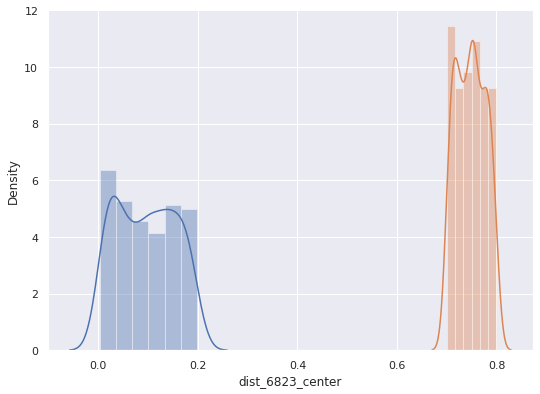

In [28]:
sns.distplot(member['dist_6823_center'])
sns.distplot(non_member['dist_6823_center'])
plt.show()

In [29]:
training_data = pd.concat([member, non_member])

In [30]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6823_center,member
count,4.400000e+02,4.400000e+02,4.400000e+02,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,4.400000e+02,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,436.000000,436.000000,436.000000,440.000000,436.000000,436.000000,436.000000,5.000000,5.000000,440.000000,5.000000,5.000000,5.0,440.000000,440.000000,440.000000,440.000000,285.000000,285.000000,285.000000,285.000000,113.000000,113.000000,113.000000,113.00000,113.000000,113.000000,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,440.000000,440.000000,440.000000,220.000000,440.000000,440.000000
mean,1.635721e+18,2.001356e+18,8.507318e+08,2015.5,295.732686,0.065669,23.322037,0.077096,0.743953,0.103956,11.309163,-1.641665,0.135898,-5.380275,0.154995,0.020443,-0.005338,-0.239398,0.031114,0.183382,0.002214,-0.230454,-0.142278,-0.108791,0.011562,261.272727,12.915909,259.670455,1.602273,1.981085,354.925110,0.226219,3.241022e+00,31.0,29.652861,1.426238,0.020212,0.015742,29.800000,13.788636,...,438.369232,15.220403,1.410254,0.125000,1.846171,0.886156,0.960015,-18.078044,1.269891,0.072727,5200.000000,3.200000,0.0,59.396466,-0.089175,303.538654,43.810325,100064.382456,4468.075684,4266.732422,4776.607422,2.017716,1.757553,2.342454,1.01187,0.876910,1.185432,200111.0,4.038405,3.585587,4.398537,14.516895,12.565598,16.468203,0.421957,33.061770,74.460751,0.705000,0.421923,0.500000
std,0.000000e+00,5.716879e+16,4.884979e+08,0.0,0.418850,0.088440,0.369350,0.125366,1.164808,0.177118,14.323897,3.727506,0.181717,5.306006,0.248125,0.102395,0.111384,0.148124,0.084397,0.099204,0.091656,0.122917,0.124122,0.111144,0.114190,29.906737,54.006873,29.784542,2.508935,7.392857,581.767700,0.551307,1.701255e+01,0.0,73.044075,0.098954,0.030458,0.049989,3.328759,1.002665,...,381.688568,1.735493,0.248497,0.351129,0.656425,0.457694,0.248256,15.661869,1.119796,0.748077,836.660034,0.273861,0.0,0.358745,0.394520,0.521448,0.377848,350.369741,583.929565,594.787476,559.506287,0.771497,0.787152,0.702121,0.39007,0.396996,0.358983,0.0,3.223005,2.857294,3.496004,36.898537,32.626293,41.180477,0.330047,39.629634,66.555401,0.279142,0.330014,0.500569
min,1.635721e+18,1.827754e+18,4.909804e+06,2015.5,294.931983,0.011649,22.509862,0.013922,0.151648,0.018766,3.031419,-17.901602,0.023730,-34.759110,0.026963,-0.371867,-0.356643,-0.713473,-0.247628,-0.286592,-0.231666,-0.711844,-0.451856,-0.696058,-0.460995,117.000000,0.000000,117.000000,0.000000,-8.513625,84.4224

In [31]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [32]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,440.000000,440.000000,440.000000
mean,0.743953,-1.641665,-5.380278
std,1.164807,3.727507,5.306005
min,0.151648,-17.901602,-34.759109
25%,0.415635,-2.323934,-5.629674
50%,0.482956,-1.777486,-5.299296
75%,0.640367,-1.441216,-4.809883
max,20.758856,41.726761,67.030060


In [33]:
targets.value_counts()

1    220
0    220
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


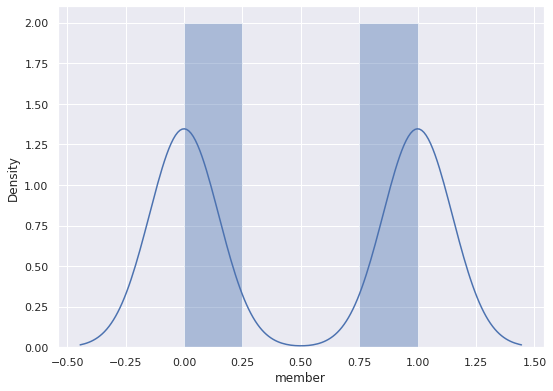

In [34]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

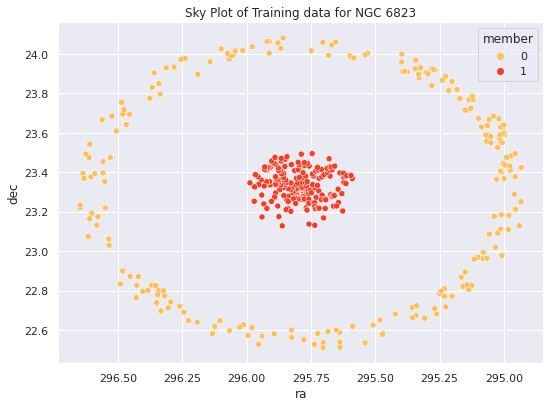

In [35]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 6823')
plt.show()

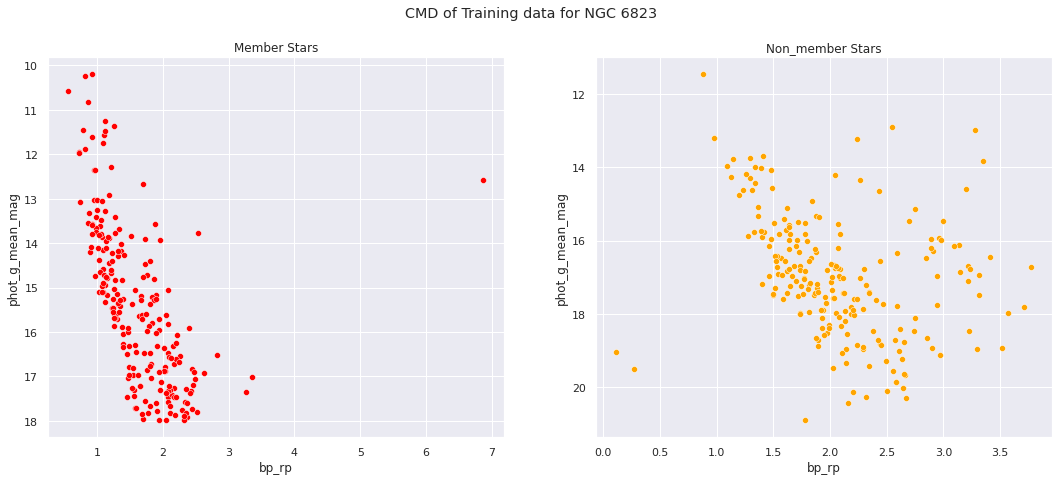

In [36]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 6823 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


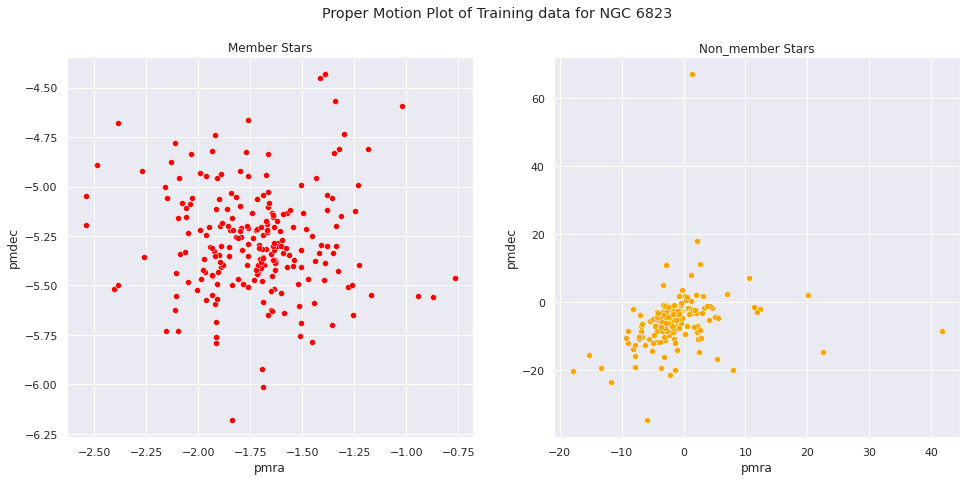

In [37]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 6823 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


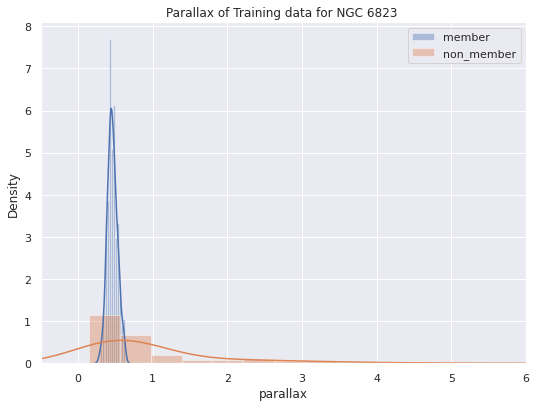

In [38]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 6823 ')
plt.legend()
plt.show()

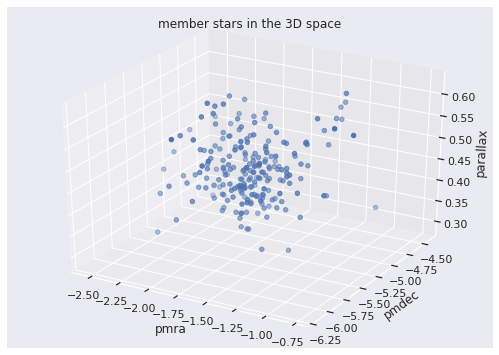

In [39]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


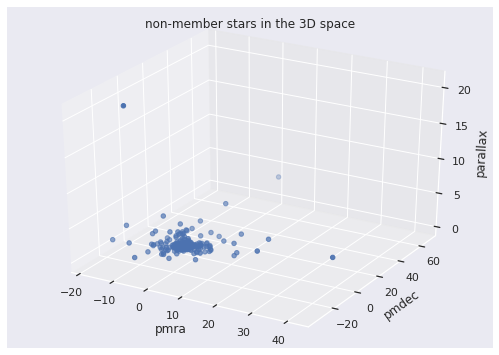

In [40]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [41]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.370876
pmdec       0.355580
parallax    0.273544
dtype: float64

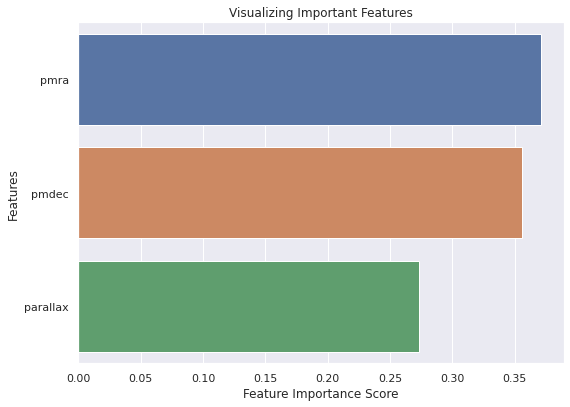

In [43]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [46]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [116]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [117]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [118]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [119]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0009765625,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.943
Accuracy on test data: 0.947


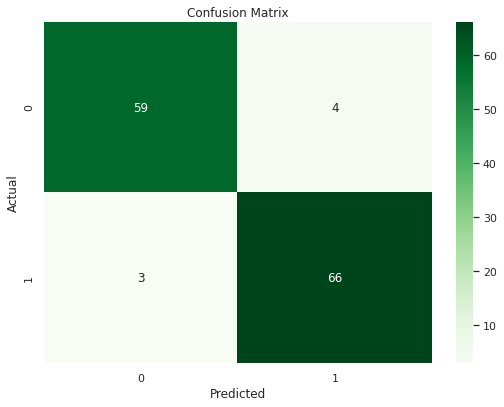

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.94      0.96      0.95        69

    accuracy                           0.95       132
   macro avg       0.95      0.95      0.95       132
weighted avg       0.95      0.95      0.95       132



In [120]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.968
Precision on testing data: 0.926
Accuracy on test data: 0.917


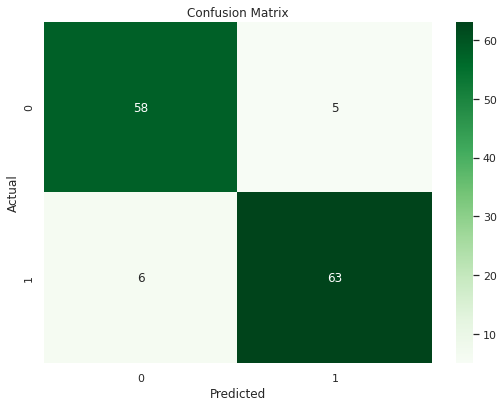

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.93      0.91      0.92        69

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132



In [121]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [122]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6823_center
count,3.309800e+04,3.309800e+04,3.309800e+04,33098.0,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.000000,33098.0,33098.000000,33096.000000,33096.000000,33098.000000,33098.000000,33098.000000,...,3.245200e+04,32452.000000,32452.000000,32452.000000,32451.000000,33098.000000,32451.000000,32453.000000,32452.000000,768.000000,768.000000,33098.000000,768.000000,768.000000,768.000000,33098.000000,33098.000000,33098.000000,33098.000000,15205.000000,15205.000000,15205.000000,15205.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,10800.0,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,33098.000000,33098.000000,33098.000000,33098.000000
mean,1.635721e+18,2.001846e+18,8.451964e+08,2015.5,295.786517,0.098506,23.296662,0.114653,0.994159,0.152209,11.203165,-1.752804,0.204239,-5.338050,0.231349,0.069761,0.026165,-0.200740,0.009111,0.170764,-0.018361,-0.206481,-0.167463,-0.067158,0.068517,271.045320,6.188682,269.459182,1.586138,3.723292,521.562317,0.375577,8.156396,31.0,12.074049,1.395642,0.029999,0.035082,30.907215,13.892018,...,2.070326e+04,62.949960,340.429321,15.989408,1.459258,0.096834,2.067703,1.017556,1.050153,-6.288860,1.823829,0.182368,5060.091309,3.272786,-0.063802,59.399117,-0.144598,303.596817,43.773704,100053.432489,4294.790527,4094.107422,4617.712402,1.969404,1.732409,2.229562,0.989672,0.866916,1.124344,200111.0,2.757592,2.420512,3.003553,5.467942,4.702305,6.233587,0.556269,35.090057,56.375156,0.556268
std,0.000000e+00,5.641973e+16,4.885563e+08,0.0,0.457485,0.120899,0.406378,0.144702,1.141614,0.191454,16.750174,5.357303,0.251228,6.840462,0.294368,0.101194,0.120102,0.119406,0.083300,0.116623,0.090388,0.106883,0.108950,0.101332,0.097958,27.015809,39.536644,27.010042,2.093192,10.953895,3200.556885,0.816382,95.160617,0.0,42.894745,0.101579,0.035847,0.048215,3.038443,1.066058,...,3.609731e+05,2553.821207,331.610809,1.574548,0.245651,0.346716,0.635817,0.440750,0.248391,27.779932,2.643297,1.259669,691.844849,0.498500,0.301558,0.401937,0.424434,0.575154,0.411391,319.079243,508.049683,523.464111,513.443359,0.805951,0.837684,0.779691,0.409981,0.424868,0.398920,0.0,3.534768,3.129756,3.867502,32.484154,27.780685,37.247433,0.179607,69.459194,87.718358,0.179608
min,1.635721e+18,1.827753e+18,6.724900e+04,2015.5,294.917351,0.010592,22.500839,0.012334,0.093601,0.016497,3.000015,-

In [123]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_6823_center'] <= cantat_radius*2]

In [124]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [125]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [126]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [127]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    5964
1     311
Name: member, dtype: int64

In [128]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

311

In [129]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

311

In [130]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6823_center,member,PMemb
count,3.110000e+02,3.110000e+02,3.110000e+02,311.0,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.00000,311.000000,311.000000,311.000000,311.000000,311.000000,3.110000e+02,311.0,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,308.000000,308.000000,308.000000,311.000000,308.000000,308.000000,308.000000,5.000000,5.000000,311.000000,5.000000,5.00000,5.0,311.000000,311.000000,311.000000,311.000000,199.000000,199.000000,199.000000,199.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,311.000000,311.000000,311.000000,311.000000,311.0,311.000000
mean,1.635721e+18,2.020093e+18,8.782451e+08,2015.5,295.784730,0.050055,23.347315,0.056708,0.467139,0.077884,8.330451,-1.848349,0.103069,-5.264016,0.112768,0.031778,-0.002688,-0.220914,0.019191,0.235795,-0.017733,-0.217037,-0.158907,-0.089781,0.039257,266.411576,11.26045,264.993569,1.418006,2.049231,339.474365,0.136748,2.504359e+00,31.0,22.510994,1.410203,0.015162,0.024458,30.318328,13.581994,...,439.851471,15.231527,1.403915,0.112540,2.012049,1.018114,0.993936,13.259964,0.743363,0.106109,4800.000000,3.30000,0.0,59.441795,-0.118150,303.611411,43.823845,100081.522613,4357.064941,4168.884766,4686.152832,2.397563,2.134107,2.699646,1.202637,1.067498,1.367886,200111.0,4.157456,3.679178,4.499108,15.733833,13.683820,17.783842,0.304673,25.420691,66.212541,0.304670,1.0,0.824005
std,0.000000e+00,7.410502e+13,5.050438e+08,0.0,0.245165,0.027802,0.214698,0.031318,0.081371,0.042850,5.306750,0.331053,0.057506,0.417998,0.062549,0.092062,0.122067,0.135317,0.073530,0.105368,0.083529,0.103174,0.114687,0.097599,0.083224,24.598277,53.67825,24.475794,1.925767,5.999976,314.945679,0.177960,7.567967e+00,0.0,63.218201,0.098004,0.008528,0.043758,2.764688,0.989720,...,339.586884,1.443741,0.144029,0.345763,0.722596,0.494109,0.241786,30.966730,0.497900,0.864158,570.087708,0.67082,0.0,0.220888,0.219056,0.313663,0.213383,393.852570,563.196228,574.212402,561.761475,0.544476,0.612223,0.447534,0.279319,0.314190,0.220308,0.0,3.808489,3.580391,3.997724,62.244869,55.143108,69.348274,0.076952,16.686191,42.026906,0.076949,0.0,0.155016
min,1.635721e+18,2.019934e+18,2.032903e+06,2015.5,295.360709,0.012088,22.916493,0.014041,0.135902,0.020325,3.012581,-2.524595,0.024632,-6.386500,0.027023,-0.225975,-0.403054,-0.562170,-0.150505,-0.049264,-0.276242,-0.505089,-0.618426,-0.358507,-0.208617,203.000000,0.00000,199.000000,0.000000,-8.039094,124.999901,0.000000,0.000000e+00,31.

In [131]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6823_center,member
count,2.200000e+02,2.200000e+02,2.200000e+02,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,219.000000,219.000000,219.000000,220.000000,219.000000,219.000000,219.000000,0.0,0.0,220.0,0.0,0.0,0.0,220.000000,220.000000,220.000000,220.000000,173.000000,173.000000,173.000000,173.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0
mean,1.635721e+18,2.020091e+18,8.898165e+08,2015.5,295.792617,0.039140,23.329534,0.044425,0.460003,0.059886,10.441980,-1.724831,0.081037,-5.280752,0.088196,-0.036800,-0.049172,-0.293734,0.072898,0.191215,0.042054,-0.272684,-0.097298,-0.157476,-0.054611,245.350000,22.518182,243.609091,1.740909,0.613675,296.973175,0.073778,1.750059,31.0,50.028385,1.463395,0.011651,-0.005027,28.031818,13.622727,...,502.070312,14.524571,1.344774,0.172727,1.616946,0.756760,0.860186,NaN,NaN,0.0,NaN,NaN,NaN,59.429835,-0.133372,303.615194,43.805056,100059.121387,4615.183594,4430.080566,4918.141113,2.032288,1.728835,2.419694,1.015488,0.855196,1.217604,200111.0,4.828623,4.317302,5.223732,20.218653,17.528107,22.909193,0.095527,29.318221,83.498502,0.705000,0.095523,1.0
std,0.000000e+00,1.275173e+13,4.725485e+08,0.0,0.085578,0.023554,0.074354,0.026102,0.065768,0.035877,5.336896,0.281343,0.049533,0.265237,0.053779,0.082060,0.091110,0.157904,0.071595,0.099685,0.083795,0.122944,0.129104,0.111266,0.102184,26.872611,69.877418,26.611391,2.920743,6.716753,616.873413,0.126891,12.789674,0.0,94.827057,0.093706,0.007173,0.047051,2.981509,0.954887,...,396.440247,1.652384,0.112265,0.390740,0.621411,0.421719,0.221961,NaN,NaN,0.0,NaN,NaN,NaN,0.077314,0.075667,0.109936,0.073547,336.016892,630.935120,623.622620,619.761658,0.567328,0.565510,0.460402,0.288556,0.287885,0.235884,0.0,3.260908,2.935808,3.476829,43.775967,38.749149,48.813389,0.058610,15.612852,44.083880,0.279142,0.058604,0.0
min,1.635721e+18,2.020031e+18,1.017820e+07,2015.5,295.589029,0.011649,23.128553,0.014271,0.289477,0.018766,3.054510,-2.541669,0.023894,-6.179777,0.026963,-0.371867,-0.356643,-0.713473,-0.144755,-0.286592,-0.223280,-0.711844,-0.357489,-0.696058,-0.460995,140.000000,0.000000,140.000000,0.000000,-8.513625,84.422424,0.000000,0.000000,31.0,0.803691,1.023783,0.003340,-0.116399,17.000000,10.000000,...,17.559866,9.652855,1.19

#### Visualization

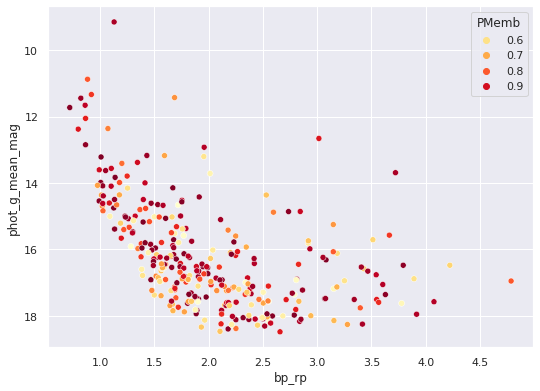

In [132]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

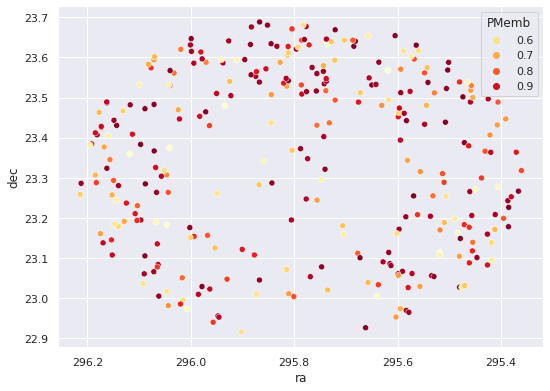

In [133]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

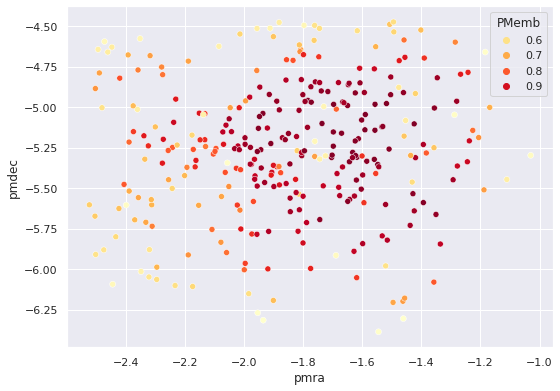

In [134]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


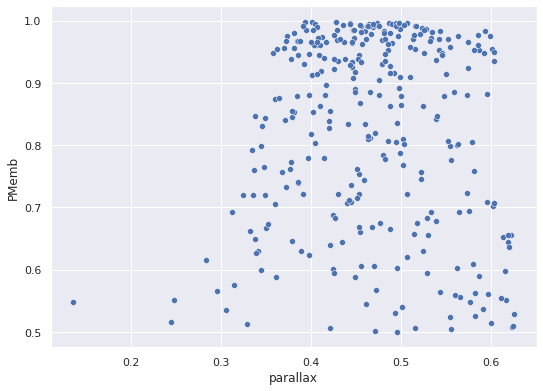

In [135]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [136]:
# saving the files as csv
# all_stars.to_csv('gaia_6823_membership_prob.csv')

potentialMember.to_csv('NGC_6823_membership_prob.csv')


### Comparing the old and new predicted members

In [137]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [138]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6823_center,member,PMemb
count,5.310000e+02,5.310000e+02,5.310000e+02,531.0,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.0,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,...,527.000000,527.000000,527.000000,531.000000,527.000000,527.000000,527.000000,5.000000,5.000000,531.000000,5.000000,5.00000,5.0,531.000000,531.000000,531.000000,531.000000,372.000000,372.000000,372.000000,372.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,276.0,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,531.000000,531.000000,531.000000,531.000000,531.0,531.000000
mean,1.635721e+18,2.020093e+18,8.830393e+08,2015.5,295.787998,0.045533,23.339948,0.051619,0.464183,0.070427,9.205286,-1.797174,0.093941,-5.270950,0.102587,0.003365,-0.021947,-0.251085,0.041442,0.217325,0.007037,-0.240092,-0.133382,-0.117828,0.000366,257.685499,15.924670,256.133710,1.551789,1.454462,321.865570,0.110659,2.191843,31.0,33.911804,1.432241,0.013707,0.012242,29.370998,13.598870,...,465.707092,14.937742,1.379338,0.137476,1.847860,0.909505,0.938355,13.259964,0.743363,0.062147,4800.000000,3.30000,0.0,59.436840,-0.124457,303.612978,43.816060,100071.104839,4477.104980,4290.355957,4794.039062,2.260585,1.982130,2.594663,1.132456,0.987884,1.311530,200111.0,4.505198,4.009801,4.874549,18.057491,15.675610,20.439365,0.218021,27.035487,73.374333,0.218018,1.0,0.774700
std,0.000000e+00,5.727333e+13,4.914205e+08,0.0,0.195442,0.026651,0.171239,0.029864,0.075316,0.041043,5.415254,0.317048,0.055372,0.362400,0.060251,0.094251,0.112564,0.149339,0.077341,0.105277,0.088608,0.114999,0.124513,0.108633,0.102508,27.570783,61.104534,27.462548,2.391544,6.340285,464.430176,0.161681,10.061264,0.0,78.976707,0.099670,0.008173,0.047392,3.068376,0.974737,...,365.218781,1.571550,0.134841,0.365916,0.709067,0.482518,0.242676,30.966730,0.497900,0.662968,570.087708,0.67082,0.0,0.176191,0.174611,0.250086,0.170156,367.772617,608.650757,610.973083,599.934082,0.578827,0.624743,0.470688,0.296006,0.320505,0.236893,0.0,3.544833,3.271969,3.747641,53.425560,47.313717,59.542870,0.124569,16.348447,43.689389,0.124567,0.0,0.222925
min,1.635721e+18,2.019934e+18,2.032903e+06,2015.5,295.360709,0.011649,22.916493,0.014041,0.135902,0.018766,3.012581,-2.541669,0.023894,-6.386500,0.026963,-0.371867,-0.403054,-0.713473,-0.150505,-0.286592,-0.276242,-0.711844,-0.618426,-0.696058,-0.460995,140.000000,0.000000,140.000000,0.000000,-8.513625,84.422424,0.000000,0.000000,31.0,0.5

In [139]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6823_center,member
count,2.200000e+02,2.200000e+02,2.200000e+02,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,219.000000,219.000000,219.000000,220.000000,219.000000,219.000000,219.000000,0.0,0.0,220.0,0.0,0.0,0.0,220.000000,220.000000,220.000000,220.000000,173.000000,173.000000,173.000000,173.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0
mean,1.635721e+18,2.020091e+18,8.898165e+08,2015.5,295.792617,0.039140,23.329534,0.044425,0.460003,0.059886,10.441980,-1.724831,0.081037,-5.280752,0.088196,-0.036800,-0.049172,-0.293734,0.072898,0.191215,0.042054,-0.272684,-0.097298,-0.157476,-0.054611,245.350000,22.518182,243.609091,1.740909,0.613675,296.973175,0.073778,1.750059,31.0,50.028385,1.463395,0.011651,-0.005027,28.031818,13.622727,...,502.070312,14.524571,1.344774,0.172727,1.616946,0.756760,0.860186,NaN,NaN,0.0,NaN,NaN,NaN,59.429835,-0.133372,303.615194,43.805056,100059.121387,4615.183594,4430.080566,4918.141113,2.032288,1.728835,2.419694,1.015488,0.855196,1.217604,200111.0,4.828623,4.317302,5.223732,20.218653,17.528107,22.909193,0.095527,29.318221,83.498502,0.705000,0.095523,1.0
std,0.000000e+00,1.275173e+13,4.725485e+08,0.0,0.085578,0.023554,0.074354,0.026102,0.065768,0.035877,5.336896,0.281343,0.049533,0.265237,0.053779,0.082060,0.091110,0.157904,0.071595,0.099685,0.083795,0.122944,0.129104,0.111266,0.102184,26.872611,69.877418,26.611391,2.920743,6.716753,616.873413,0.126891,12.789674,0.0,94.827057,0.093706,0.007173,0.047051,2.981509,0.954887,...,396.440247,1.652384,0.112265,0.390740,0.621411,0.421719,0.221961,NaN,NaN,0.0,NaN,NaN,NaN,0.077314,0.075667,0.109936,0.073547,336.016892,630.935120,623.622620,619.761658,0.567328,0.565510,0.460402,0.288556,0.287885,0.235884,0.0,3.260908,2.935808,3.476829,43.775967,38.749149,48.813389,0.058610,15.612852,44.083880,0.279142,0.058604,0.0
min,1.635721e+18,2.020031e+18,1.017820e+07,2015.5,295.589029,0.011649,23.128553,0.014271,0.289477,0.018766,3.054510,-2.541669,0.023894,-6.179777,0.026963,-0.371867,-0.356643,-0.713473,-0.144755,-0.286592,-0.223280,-0.711844,-0.357489,-0.696058,-0.460995,140.000000,0.000000,140.000000,0.000000,-8.513625,84.422424,0.000000,0.000000,31.0,0.803691,1.023783,0.003340,-0.116399,17.000000,10.000000,...,17.559866,9.652855,1.19

In [140]:
concatenated.dataset.value_counts()

New_member    311
Old_member    220
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

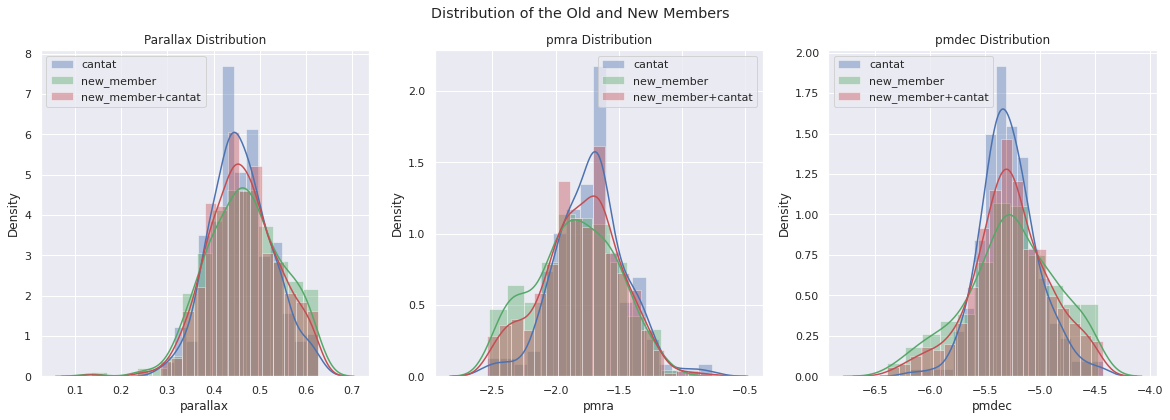

In [141]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


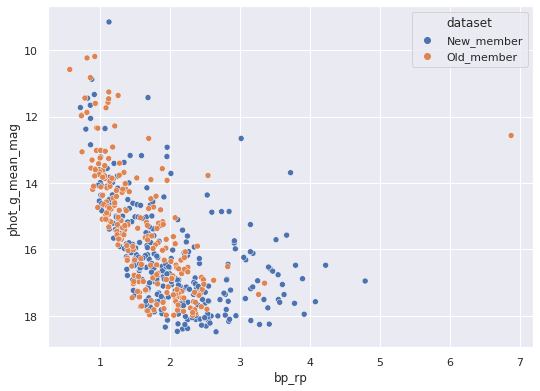

In [142]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

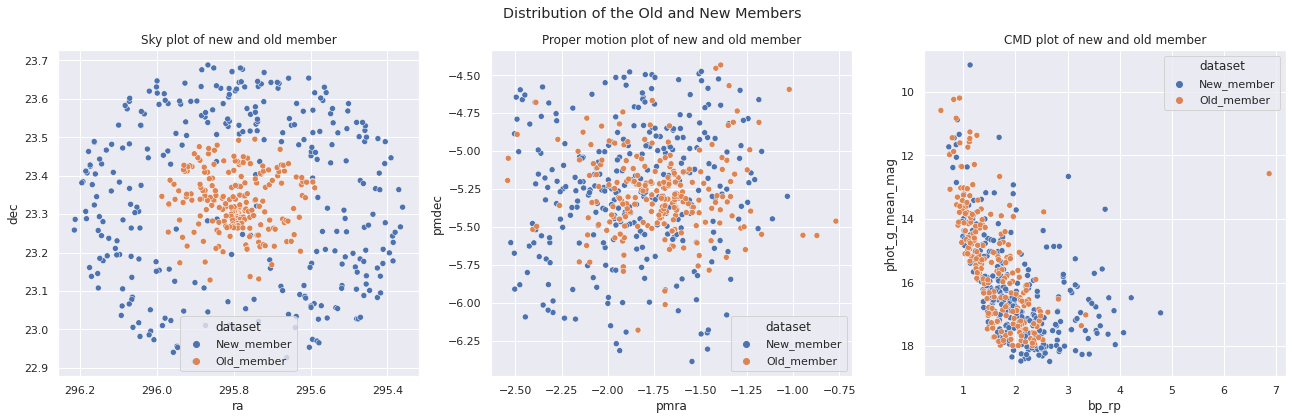

In [150]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

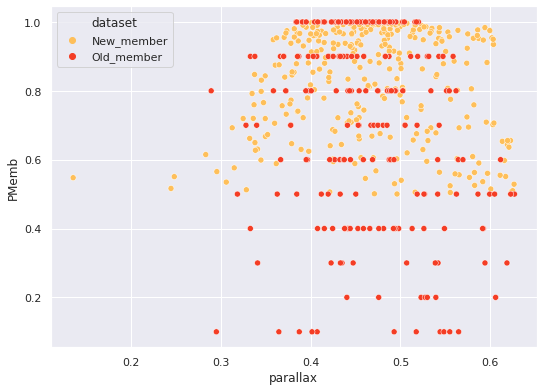

In [144]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [145]:
# pd_prof.ProfileReport(potentialMember)

In [146]:
#files.download('NGC_6823_cantat.csv')

#files.download('NGC_6823_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


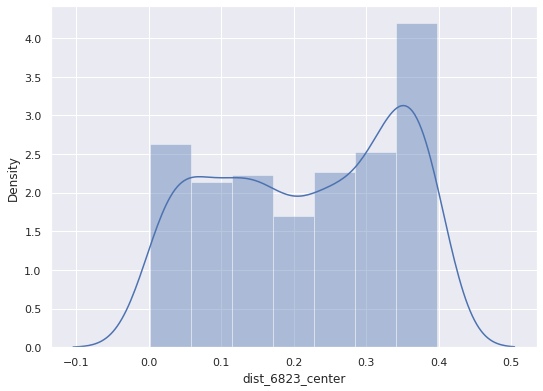

In [147]:
sns.distplot(concatenated['dist_6823_center'])

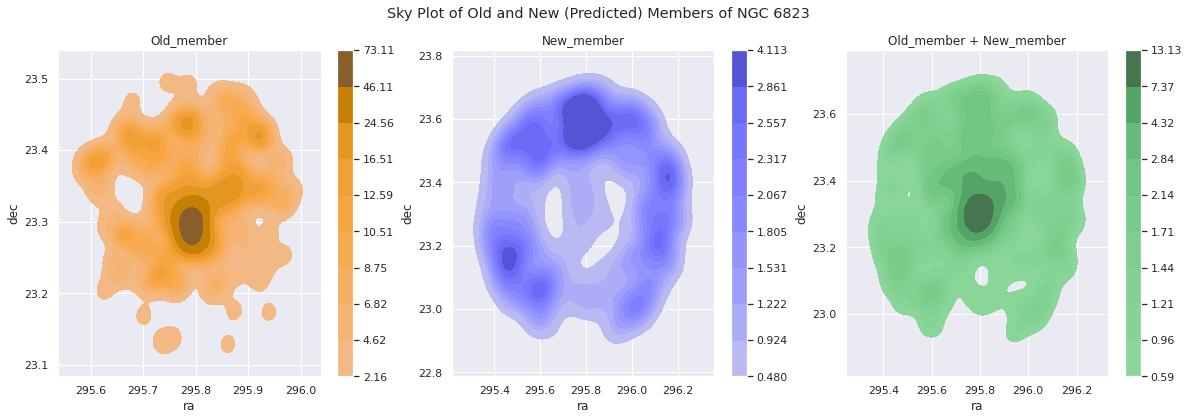

In [148]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 6823')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

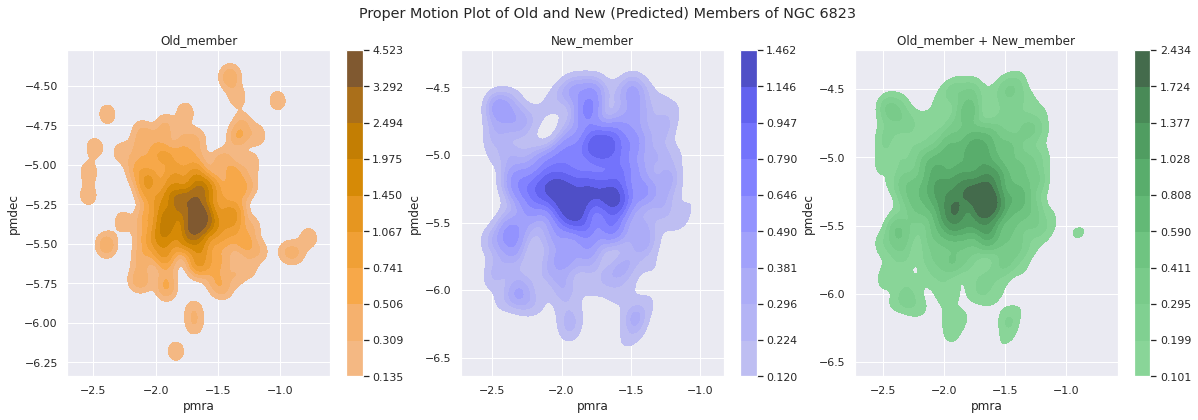

In [149]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 6823')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [149]:
#files.download('NGC_6823_cantat.csv')

potentialMember.to_csv('NGC_6823_additional_member_prob.csv')
concatenated.to_csv('NGC_6823_all_member_prob.csv')

files.download('NGC_6823_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_6823_additional_member_prob.csv')
